In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cal_overlap(obj, real_index):

    ratio = []
    for i in range(0, len(obj)):
        tmp = np.isin(np.array(real_index)[i], obj[i])
        ratio.append(np.mean(tmp))
    
    return ratio


In [3]:
mv_dir_path = "mvsusie_simulation"

with open(os.path.join('data', mv_dir_path, "ESNN.obj"), 'rb') as f:
    mv_object = pickle.load(f)
mv_object

[[array([1]), array([3]), array([2]), array([0])],
 [array([0]), array([1]), array([4]), array([2]), array([3])],
 [array([2]), array([3]), array([1]), array([4]), array([0])],
 [array([3]), array([2]), array([4]), array([1]), array([0])],
 [array([3]), array([2]), array([0]), array([4]), array([1])],
 [array([0]), array([4]), array([3]), array([2]), array([1])],
 [array([3]), array([2]), array([1]), array([4]), array([0])],
 [array([0]), array([4]), array([2]), array([1]), array([3])],
 [array([2]), array([1]), array([0]), array([4]), array([3])],
 [array([0]), array([3]), array([1]), array([4]), array([2])]]

In [4]:
vim_dir_path = "VIMCO_simulation"

with open(os.path.join('data', vim_dir_path, "ESNN.obj"), 'rb') as f:
    vim_object = pickle.load(f)

vim_object

[[array([46]),
  array([190]),
  array([63]),
  array([199]),
  array([184]),
  array([31]),
  array([49]),
  array([77])],
 [array([108]),
  array([124]),
  array([89]),
  array([39]),
  array([84]),
  array([184]),
  array([87]),
  array([132]),
  array([161])],
 [array([10]),
  array([157]),
  array([38]),
  array([47]),
  array([119]),
  array([136]),
  array([139]),
  array([181]),
  array([103])],
 [array([20]),
  array([45]),
  array([34]),
  array([4]),
  array([130]),
  array([103]),
  array([123]),
  array([173]),
  array([113]),
  array([198])],
 [array([46]),
  array([100]),
  array([16]),
  array([34]),
  array([56]),
  array([126]),
  array([114])],
 [array([164]),
  array([197]),
  array([123]),
  array([150]),
  array([55]),
  array([91]),
  array([157]),
  array([46]),
  array([35])],
 [array([82]),
  array([108]),
  array([69]),
  array([46]),
  array([101]),
  array([194]),
  array([103]),
  array([148])],
 [array([21]),
  array([64]),
  array([117]),
  array([67]),


In [5]:
## mvsusie
cs_mv_ref = [range(0,5) for i in range(0, 10)]
cs_mvsusie = cal_overlap(mv_object, cs_mv_ref)
cs_mvsusie   

[0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [6]:
## VIMCO
cs_vim_ref = [[32  ,47  ,50  ,64  ,74  ,78 ,139 ,185 ,191 ,200],
              [17  ,40  ,85  ,88  ,90 ,109 ,125 ,133 ,162 ,185 ,186 ,188],
              [11  ,39  ,48 ,104 ,120 ,137 ,140 ,158 ,182],
              [5  ,21  ,35  ,46 ,104 ,114 ,124 ,131 ,174 ,199],
              [17  ,35  ,47  ,57 ,101 ,115 ,127],
              [36  ,47  ,56  ,92 ,124 ,140 ,151 ,158 ,165 ,198],
              [47  ,70  ,83 ,102 ,104 ,109 ,149 ,195],
              [8  ,14  ,22  ,36  ,37  ,42  ,45  ,65  ,68 ,118 ,123 ,134 ,147 ,175 ,189 ,198],
              [17  ,52  ,84 ,110 ,137 ,171 ,172 ,188],
              [5  ,30  ,66 ,127 ,149 ,164 ,177]]
for i in range(0,len(cs_vim_ref)):
     for j in range(0, len(cs_vim_ref[i])):
        cs_vim_ref[i][j]-=1

cs_vimco = cal_overlap(vim_object, cs_vim_ref)
cs_vimco   

/var/folders/4w/6dv4ws9j3_d0k473qtrr7yq80000gn/T/ipykernel_53268/1030515815.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = np.isin(np.array(real_index)[i], obj[i])


[0.8, 0.75, 1.0, 1.0, 1.0, 0.9, 1.0, 0.625, 1.0, 1.0]

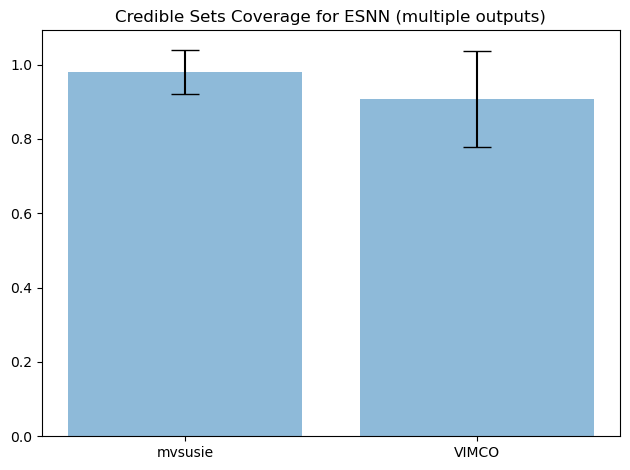

In [9]:
heights_cs = [np.mean(cs_mvsusie), np.mean(cs_vimco)]
cs_mvsusie_std = np.std(cs_mvsusie)
cs_vimco_std = np.std(cs_vimco)
error = [cs_mvsusie_std, cs_vimco_std]
x_label = ["mvsusie", "VIMCO"]

fig, ax = plt.subplots()
ax.bar(x_label, heights_cs, yerr=error,
        align='center',
        alpha=0.5,
        ecolor='black',
        capsize=10)
ax.set_title('Credible Sets Coverage for ESNN (multiple outputs)')
plt.savefig('bar_plot_mvsusie_vimco.png')
plt.tight_layout()
plt.show()